# Análisis 2da Encuesta de inserción de científicos en Chile

**Autor:** Roberto Muñoz <br />
**E-mail:** <rmunoz@metricarts.com> <br />
**Github:** <https://github.com/rpmunoz> <br />

Análisis preliminar de la [2da Encuesta de inserción de científicos](https://www.anip.cl/encuesta-insercion-2018) llevada a cabo por el Centro de estudios de la ANIP. 

In [59]:
import os
import shutil
import numpy as np
import pandas as pd
from scipy import stats, integrate

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.core.display import display, HTML

%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (8, 6),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'axes.titlepad': 16,
         'axes.titlesize': 20,
         'axes.labelpad': 16,
         'axes.labelsize': 16,
         'lines.linewidth': 3,
         'lines.markersize': 8,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
plt.rcParams.update(params)

pd.set_option('display.max_columns', None)

## 1. Cargamos el archivo de datos original

Cargamos el archivos de datos que contiene todas las encuestas válidas. 

In [2]:
encuesta_full_file="../encuesta/E2018-full-answers.csv"

encuesta_full_df=pd.read_csv(encuesta_full_file)
encuesta_full_df.head()

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

In [3]:
n_registros=len(encuesta_full_df)
print("Numbero de registros", n_registros)

Numbero de registros 752


In [4]:
n_campos=len(list(encuesta_full_df.keys()))
print("Numbero de campos", n_campos)

Numbero de campos 132


In [5]:
encuesta_full_df.dtypes.to_frame().transpose()

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

## 2. Análisis exploratorio y limipieza de datos

Haremos un análisis exploratorio de los datos. Nos concetraremos en los últimos campos de la encuesta para revisar errores de arrastre o tipeo.

In [160]:
field_names_full=['¿Cuál es tu género?',
             '¿Cuál es tu edad?',
             '¿Cuál es tu nacionalidad? En caso de tener más de una nacionalidad, por favor escoge tu país de origen (donde naciste).']

Primero buscamos cuales de estos campos contienen valores NaN

In [161]:
encuesta_full_df[field_names_full].isnull().sum()

¿Cuál es tu género?                                                                                                         0
¿Cuál es tu edad?                                                                                                          34
¿Cuál es tu nacionalidad? En caso de tener más de una nacionalidad, por favor escoge tu país de origen (donde naciste).     0
dtype: int64

Luego buscamos los valores únicos de estos campos para encontrar posibles errores

In [162]:
for field_name in field_names_full:
    print(encuesta_full_df[field_name].unique())

['Masculino' 'Femenino' 'Prefiero no responder' 'Otro (no binario)']
[ 40.  37.  36.  31.  32.  43.  42.  41.  34.  39.  33.  27.  29.  30.  49.
  38.  48.  35.  nan  44.  52.  25.  45.  28.  57.  26.  50.  46.  61.  58.
  47.  68.  53.]
['Chile' 'Francia' 'España' 'Colombia' 'Bélgica' 'Uruguay' 'Venezuela'
 'Ecuador' 'Brasil' 'Reino Unido' 'Alemania' 'Canadá' 'Argentina' 'Perú'
 'Estados Unidos de América' 'Italia' 'Cuba' 'Portugal' 'Rusia' 'Bolivia']


Podemos notar que existe un existen respuestas incorrectas en los campos Genero, Edad y Nacionalidad. Explores cuales ID son las respuestas afectadas

Haremos una copia del archivo csv y buscaremos esos registros e

In [163]:
encuesta_full_file="../encuesta/E2018-full-answers.csv"
encuesta_clean_file="../encuesta/E2018-full-answers-clean.csv"

if not os.path.exists(encuesta_clean_file):
    shutil.copyfile(encuesta_full_file, encuesta_clean_file)

In [164]:
encuesta_full_df[encuesta_full_df['¿Cuál es tu género?']==' o buscan técnicos que salen más económicos para que aprendan lo básico (y no necesariamente ir subiendo sus puestos) o buscan doctorados expertos en un área. Estando uno en un nivel intermedio (o avanzado en un área ahora sin oferta) es difícil encontrar algo.']

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

- Corregimos la respuesta abierta del ID 334.

Aquí el error ocurre en el campo 'Finalmente, ¿cuál es tu opinión sobre el sistema de ciencia y tecnología en Chile, y sobre el proceso de inserción de científicos en Chile?', donde la persona responde usando coma y el sistema separa la respuesta en dos campos. Agregamos doble comillas

In [165]:
encuesta_full_df[encuesta_full_df['¿Cuál es tu género?']=='Creo que es muy deficiente. Faltan mecanismos para integrarse, recursos para financiar las iniciativas de inserción estatales y fomentar la participción del mundo privado. Quizás se pueda fomentar el uso de un fondo tipo Ley Valdés de donaciones, para que las empresas financien distintos tipos de investigación. ']

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

- La respuesta del registro 477 parece bien, imprimiré en pantalla la respuesta detallada

Este error es más sútil, pues en el campo '¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario]' la persona respondió dos frases y las separó por coma, lamentablemente el sistema las separó en dos columnas. Arreglamos el csv agregando doblo comilla.

In [166]:
encuesta_full_df[encuesta_full_df['¿Cuál es tu género?']==' con contrato y no con boleta.']

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

- Corregimos la respuesta abierta del ID 849.

Aquí el error ocurre en el campo 'Finalmente, ¿cuál es tu opinión sobre el sistema de ciencia y tecnología en Chile, y sobre el proceso de inserción de científicos en Chile?', donde la persona responde usando coma y el sistema separa la respuesta en dos campos. Agregamos doble comillas

In [167]:
encuesta_full_df[encuesta_full_df['¿Cuál es tu género?'].isnull()]

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

- Corregimos la respuesta abierta del ID 817.

Este error es más sútil, pues en el campo '¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario]' la persona respondió dos frases y las separó por coma, lamentablemente el sistema las separó en dos columnas. Arreglamos el csv agregando doble comilla.

## 3. Cargamos el nuevo archivo de datos

Revisaremos los valores de algunos campos

In [168]:
encuesta_clean_file="../encuesta/E2018-full-answers-clean.csv"

encuesta_full_df=pd.read_csv(encuesta_clean_file)
encuesta_full_df.head()

,ID de la respuesta,Fecha en que inició,Fecha de la ultima accion,¿Cuál es el grado académico más alto que has obtenido?,¿En qué disciplina y área clasificarías tu pregrado?,¿En qué disciplina y área clasificarías tu pregrado? [Otro],¿En qué año obtuviste tu pregrado?,¿En qué disciplina y área clasificarías tu {postgrado}?,¿En qué disciplina y área clasificarías tu {postgrado}? [Otro],¿En qué año obtuviste tu {postgrado}?,¿En qué lugar realizaste tu {postgrado}?,"En total, ¿cuántos artículos revisados por pares (peer-reviewed) has publicado en los últimos 5 años?","¿Cómo financiaste tus estudios de {postgrado}? [Fondos personales (e.g., ahorros, aporte familiar, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Trabajo durante el estudio (e.g., pasantías, ayudantías, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales nacionales (e.g., becas Conicyt, Becas Chile, premios, etc.)]","¿Cómo financiaste tus estudios de {postgrado}? [Fondos no personales extranjeros (e.g., becas o premios de universidad de estudios)]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en mi área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Ayudantía(s) en otra área de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Pasantía(s) en otros lugares de estudio o centros de investigación],"¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo en mi lugar de estudio, sin relación con mis estudios]",¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo fuera de mi lugar de estudio],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Trabajo remoto de cualquier tipo],¿Qué tipo de trabajo desempeñaste para financiar tus estudios? [Otro],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos nacionales financiaste tu {postgrado}? [Comentario].3,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Beca o premio (por favor indica el nombre de la beca o premio)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Crédito de un banco (por favor indica el nombre del banco)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].1,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Financiamiento de empleador (por favor indica el nombre del empleador)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].2,¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Otro tipo de fondos (por favor indica qué tipo)],¿Con qué tipo de fondos extranjeros financiaste tu {postgrado}? [Comentario].3,¿Estás realizando o has realizado algún postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado?,¿En qué disciplina y área clasificarías tu postdoctorado? [Otro],"¿En qué año terminaste tu postdoctorado? Si actuamente estás haciendo un postdoctorado, por favor responde ""Estoy haciendo un postdoctorado ahora"".",¿En qué lugar realizaste (o estás realizando) tu postdoctorado?,¿Has terminado más de un postdoctorado?,¿Cuántos postdoctorados has realizado?,¿Estás en Chile ahora?,¿Tuviste que renunciar a algún trabajo u oportunidad académica por volver a Chil

Primero buscamos cuales de estos campos contienen valores NaN

In [169]:
encuesta_full_df[field_names_full].isnull().sum()

¿Cuál es tu género?                                                                                                         0
¿Cuál es tu edad?                                                                                                          34
¿Cuál es tu nacionalidad? En caso de tener más de una nacionalidad, por favor escoge tu país de origen (donde naciste).     0
dtype: int64

Luego buscamos los valores únicos de estos campos para encontrar posibles errores

In [171]:
for field_name in field_names_full:
    print(encuesta_full_df[field_name].unique())

['Masculino' 'Femenino' 'Prefiero no responder' 'Otro (no binario)']
[ 40.  37.  36.  31.  32.  43.  42.  41.  34.  39.  33.  27.  29.  30.  49.
  38.  48.  35.  nan  44.  52.  25.  45.  28.  57.  26.  50.  46.  61.  58.
  47.  68.  53.]
['Chile' 'Francia' 'España' 'Colombia' 'Bélgica' 'Uruguay' 'Venezuela'
 'Ecuador' 'Brasil' 'Reino Unido' 'Alemania' 'Canadá' 'Argentina' 'Perú'
 'Estados Unidos de América' 'Italia' 'Cuba' 'Portugal' 'Rusia' 'Bolivia']


Podemos notar que los valores únicos de estos campos son correctos. Continuaremos con el análisis de los datos

## 4. Análisis exploratorio

In [192]:
field_names_full=['¿Cuál es el grado académico más alto que has obtenido?',
                  'Actualmente, ¿tienes trabajo remunerado en Chile?',
                  'Actualmente, ¿estás buscando trabajo?',
                  '¿En qué institución o área realizas tu trabajo?',
                  '¿Cuál es tu género?',
                  '¿Cuál es tu edad?',
                  '¿Cuál es tu nacionalidad? En caso de tener más de una nacionalidad, por favor escoge tu país de origen (donde naciste).']

field_names=['Grado académico',
             'Tiene trabajo remunerado',
             'Buscando trabajo',
             'Area del trabajo',
             'Genero',
             'Edad',
             'Nacionalidad']

encuesta_df=encuesta_full_df[field_names_full].copy()
encuesta_df.columns=field_names

encuesta_df.head()

,Grado académico,Tiene trabajo remunerado,Buscando trabajo,Area del trabajo,Genero,Edad,Nacionalidad
0,Doctorado (PhD),Sí,NaN,Universidad pública/tradicional,Masculino,40.0,Chile
1,Doctorado (PhD),No,Sí,NaN,Femenino,37.0,Chile
2,Magíster (MSc),No,Sí,NaN,Masculino,36.0,Chile
3,Doctorado (PhD),Sí,NaN,Universidad pública/tradicional,Masculino,31.0,Chile
4,Doctorado (PhD),Sí,NaN,Sector Empresarial,Masculino,31.0,Chile


In [193]:
encuesta_df.dtypes.to_frame().transpose()

,Grado académico,Tiene trabajo remunerado,Buscando trabajo,Area del trabajo,Genero,Edad,Nacionalidad
0,object,object,object,object,object,float64,object


In [194]:
for field_name in field_names:
    print(encuesta_df[field_name].unique())

['Doctorado (PhD)' 'Magíster (MSc)']
['Sí' 'No' nan]
[nan 'Sí' 'No']
['Universidad pública/tradicional' nan 'Sector Empresarial'
 'Trabajador independiente' 'Centro de investigación' 'Universidad Privada'
 'Institución sin fines de lucro' 'Otro' 'Administración pública'
 'Instituto Profesional']
['Masculino' 'Femenino' 'Prefiero no responder' 'Otro (no binario)']
[ 40.  37.  36.  31.  32.  43.  42.  41.  34.  39.  33.  27.  29.  30.  49.
  38.  48.  35.  nan  44.  52.  25.  45.  28.  57.  26.  50.  46.  61.  58.
  47.  68.  53.]
['Chile' 'Francia' 'España' 'Colombia' 'Bélgica' 'Uruguay' 'Venezuela'
 'Ecuador' 'Brasil' 'Reino Unido' 'Alemania' 'Canadá' 'Argentina' 'Perú'
 'Estados Unidos de América' 'Italia' 'Cuba' 'Portugal' 'Rusia' 'Bolivia']


In [195]:
field_dtypes={'Grado académico':'category',
              'Tiene trabajo remunerado':'category',
              'Buscando trabajo':'category',
              'Area del trabajo':'category',
              'Genero':'category',
              'Edad':float,
              'Nacionalidad':'category'}

for name, dtype in field_dtypes.items():
    encuesta_df[name] = encuesta_df[name].astype(dtype)

In [196]:
def autopct_generator(limit):
    def inner_autopct(pct):
        return ('%.1f%%' % pct) if pct > limit else ''
    return inner_autopct

Agregamos la categoria inactivo al campo 'Tiene trabajo remunerado'. Es útil para identificar a personas que responden No en 'Buscando trabajo'

In [216]:
encuesta_df['Tiene trabajo remunerado']=pd.Categorical(encuesta_df['Tiene trabajo remunerado'], ["Sí", "No", "Inactivo"], ordered=True)

encuesta_df['Tiene trabajo remunerado'][(encuesta_df['Tiene trabajo remunerado']=='No') & 
                                        (encuesta_df['Buscando trabajo']=='No')]='Inactivo'

#encuesta_df['Tiene trabajo remunerado'].cat.categories

## 4.1 Situación laboral

No handles with labels found to put in legend.
No handles with labels found to put in legend.


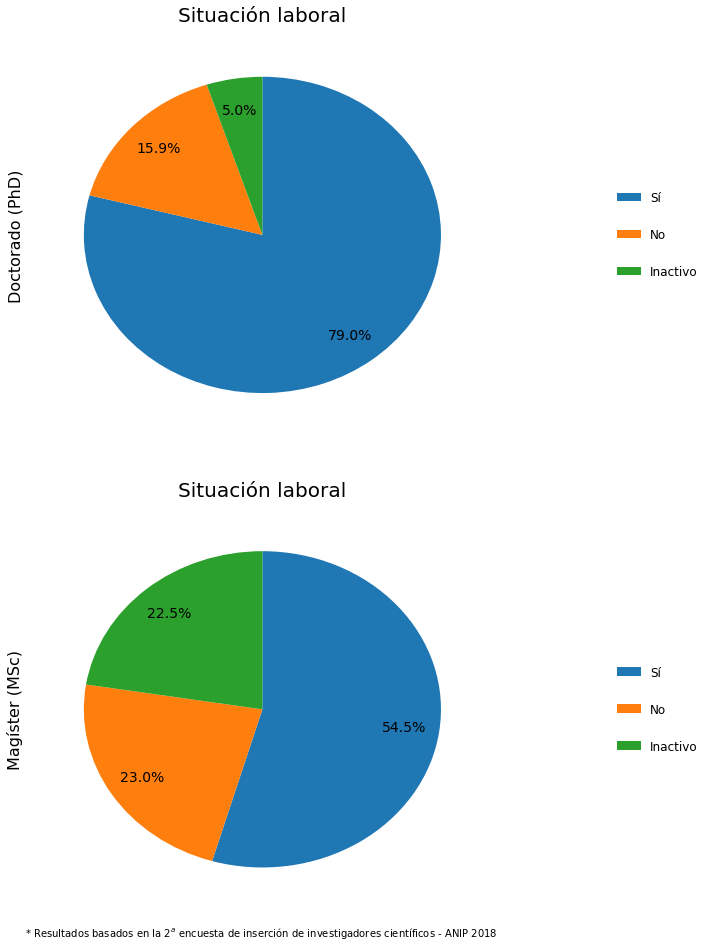

In [243]:
#data_plot=encuesta_df[encuesta_df['Grado académico']=='Doctorado (PhD)']['Tiene trabajo remunerado'].value_counts()
fig, axarr = plt.subplots(2,1, figsize=(8,16))
data_plot=encuesta_df.groupby('Grado académico')['Tiene trabajo remunerado'].value_counts().unstack('Grado académico').sort_values(by='Doctorado (PhD)', ascending=False)

data_plot.plot(kind='pie', ax=axarr, autopct='%.1f%%', labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)

for ax in axarr:
    ax.set_title('Situación laboral', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.5,0.5), labelspacing=2,
               frameon=False)

plt.figtext(0.1, 0.1, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

plt.savefig('figures/figura_1_situacion_laboral.jpg', bbox_inches='tight')
plt.savefig('figures/figura_1_situacion_laboral.pdf', bbox_inches='tight')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


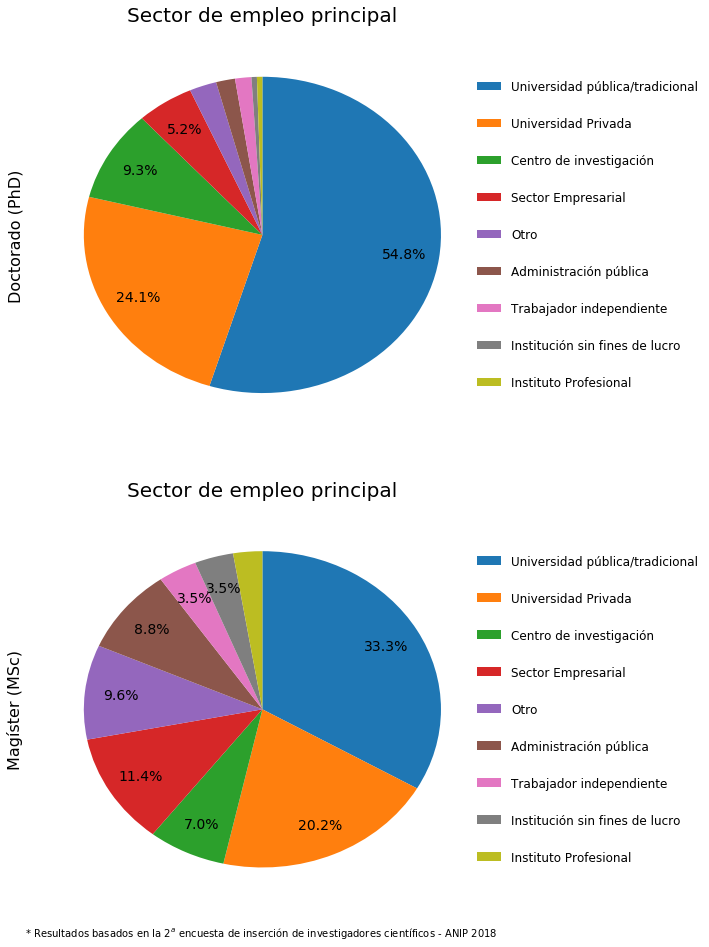

In [244]:
#data_plot=encuesta_df[encuesta_df['Grado académico']=='Doctorado (PhD)']['Area del trabajo'].value_counts()

fig, axarr = plt.subplots(2,1, figsize=(8,16))
data_plot=encuesta_df.groupby('Grado académico')['Area del trabajo'].value_counts().unstack('Grado académico').sort_values(by='Doctorado (PhD)', ascending=False)

#explode=np.linspace(0,0.5,len(data_plot.index))
data_plot.plot(kind='pie', ax=axarr, autopct=autopct_generator(3), labels=['']*len(data_plot.index),
               pctdistance=0.8, labeldistance=1.2,
               startangle=90, counterclock=False,
               fontsize=14, subplots=True)
plt.legend(labels=data_plot.index, loc='center right',
           bbox_to_anchor=(1.5,0.5), labelspacing=2,
           frameon=False)

for ax in axarr:
    ax.set_title('Sector de empleo principal', fontsize=20)
    ax.legend(labels=data_plot.index, loc='center right',
               bbox_to_anchor=(1.5,0.5), labelspacing=2,
               frameon=False)
    
plt.figtext(0.1, 0.1, '* Resultados basados en la $2^{a}$ encuesta de inserción de investigadores científicos - ANIP 2018', horizontalalignment='left')

plt.savefig('figures/figura_2_sector_empleo.jpg', bbox_inches='tight')
plt.savefig('figures/figura_2_sector_empleo.pdf', bbox_inches='tight')

# OLD

In [ ]:
for field_name in field_names:
    encuesta_full_df[field_name] = encuesta_full_df[field_name].fillna(field_fillna[field_name]).astype(field_dtypes[field_name])

In [ ]:

for key, value in dtypes_new.items():
    encuesta_full_df[key] = encuesta_full_df[key].astype(value)

#encuesta_full_df=encuesta_full_df.infer_objects()
#encuesta_full_df['Genero'] = encuesta_full_df.astype('str')

In [ ]:
field_dtypes={'Genero':str, 'Edad':int, 'Nacionalidad':str}
field_fillna={'Genero':'', 'Edad':0, 'Nacionalidad':''}


